# CDS: Numerical Methods Assignments

- See lecture notes and documentation on Brightspace for Python and Jupyter basics. If you are stuck, try to google or get in touch via Discord.

- Solutions must be submitted via the Jupyter Hub.

- Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE".

## Submission

1. Name all team members in the the cell below
2. make sure everything runs as expected
3. **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart)
4. **run all cells** (in the menubar, select Cell$\rightarrow$Run All)
5. Check all outputs (Out[\*]) for errors and **resolve them if necessary**
6. submit your solutions  **in time (before the deadline)**

## Eigenvalues and Eigenvectors

In the following you will implement your own eigenvalue / eigenvector calculation routines based on the inverse power method and the iterated QR decomposition.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

### Task 1
We start by implementing the inverse power method, which calculates the eigenvector corresponding to an eigenvalue which is closest to a given parameter $\sigma$. In detail, you should implement a Python function $\text{inversePower(A, sigma, eps)}$, which takes as input the $n \times n$ square matrix $A$, the parameter $\sigma$, as well as some accuracy $\varepsilon$. It should return the eigenvector $\mathbf{v}$ (corresponding to the eigenvalue which is closest to $\sigma$) and the number of needed iteration steps.
	
To do so, implement the following algorithm. Start by setting up the needed input:

\begin{align}
    B &= \left( A - \sigma \mathbf{1} \right)^{-1} \\
    \mathbf{b}^{(0)} &= (1,1,1,...)
\end{align}

where $\mathbf{b}^{(0)}$ is a vector with $n$ entries. Then repeat the following and increase $k$ each iteration until the error $e$ is smaller than $\varepsilon$:

\begin{align}
    \mathbf{b}^{(k)} &= B \cdot \mathbf{b}^{(k-1)} \\
    \mathbf{b}^{(k)} &= \frac{\mathbf{b}^{(k)}}{|\mathbf{b}^{(k)}|} \\
    e &= \sqrt{ \sum_{i=0}^n \left(|b_i^{(k-1)}| - |b_i^{(k)}|\right)^2 }
\end{align}

Return the last vector $\mathbf{b}^{(k)}$ and the number of needed iterations $k$. 

Verify your implementation by calculating all the eigenvectors of the matrix below and comparing them to the ones calculated by $\text{numpy.linalg.eig()}$. Then implement a unit test for your function.

\begin{align*}
    A = \begin{pmatrix}
    3 & 2 & 1\\ 
    2 & 3 & 2\\
    1 & 2 & 3
    \end{pmatrix}.
\end{align*}

In [3]:
def inversePower(A, sigma, eps):
    """The inverse power method is implemented in this function to calculate the eigenvector corresponding to an eigenvalue closest to give value sigma"""
    n = len(A)
    I = np.identity(len(A))
    B = np.linalg.inv(np.array(A - sigma*I))
    
    k = 0
    b_old = np.ones(n)
    e = 10
    while e >= eps:
        b_new = np.matmul(B, b_old)
        norm_bold = np.linalg.norm(b_old)
        b_newest = b_new/norm_bold
        sum_elements = np.zeros(n)
        for i in range(n):
            element = (np.linalg.norm(b_old[i]) - np.linalg.norm(b_newest[i]))**2
            sum_elements[i] = element
        e = np.sqrt(np.sum(sum_elements))
        k += 1
        b_old = b_newest
    
    return b_old, k

In [4]:
A = np.array([[3,2,1], [2,3,2], [1,2,3]])
print(A)
print(np.linalg.eig(A))

[[3 2 1]
 [2 3 2]
 [1 2 3]]
(array([6.37228132, 2.        , 0.62771868]), array([[-5.41774320e-01, -7.07106781e-01,  4.54401349e-01],
       [-6.42620551e-01, -7.86181869e-17, -7.66184591e-01],
       [-5.41774320e-01,  7.07106781e-01,  4.54401349e-01]]))


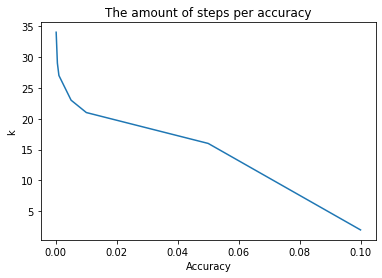

In [5]:
def test_inversePower(acc):
    """This function returns a figure of the accuracy and the corresponding number of steps neccesary."""
    P = []
    for i in range(len(acc)):
        P.append(inversePower(A, 3, acc[i])[1])
    
    plt.figure()
    plt.plot(acc, P)
    plt.xlabel('Accuracy')
    plt.ylabel('k')
    plt.title('The amount of steps per accuracy')
        
test_inversePower([0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001])

### Task 2 

Next you will need to implement the tri-diagonalization scheme following Householder. To this end implement a Python function $\text{tridiagonalize(A)}$ which takes a symmetric matrix $A$ as input and returns a tridiagonal matrix $T$ of the same dimension. Therefore, your algorithm should execute the following steps:
	
First use an assertion to make sure $A$ is symmetric. Then let $k$ run from $0$ to $n-1$ and repeat the following:

\begin{align}
    q &= \sqrt{ \sum_{j=k+1}^n \left(A_{j,k}\right)^2 } \\
    \alpha &= -\operatorname{sgn}(A_{k+1,k}) \cdot q \\
    r &= \sqrt{ \frac{ \alpha^2 - A_{k+1,k} \cdot \alpha }{2} } \\
    \mathbf{v} &= \mathbf{0} \qquad \text{... vector of dimension } n \\
    v_{k+1} &= \frac{A_{k+1,k} - \alpha}{2r} \\
    v_{k+j} &= \frac{A_{k+j,k}}{2r}  \quad \text{for } j=2,3,\dots,n \\
    P &= \mathbf{1} - 2 \mathbf{v}\mathbf{v}^T \\
    A &= P \cdot A \cdot P
\end{align}

At the end return $A$ as $T$.

Apply your routine to the matrix $A$ defined in task 1 as well as to a few random (but symmetric) matrices of different dimension $n$.

Hint: Use $\text{np.outer()}$ to calculate the *matrix* $\mathbf{v}\mathbf{v}^T$ needed in the definition of the Housholder transformation matrix $P$. 

In [ ]:
def tridiagonalize(A):
    # YOUR CODE HERE
    raise NotImplementedError()

In [ ]:
# Apply your routine here ...

# YOUR CODE HERE
raise NotImplementedError()

### Task 3

Implement the $QR$ decomposition based diagonalization routine for tri-diagonal matrices $T$ in Python as a function $\text{QREig(T, eps)}$. It should take a tri-diagonal matrix $T$ and some accuracy $\varepsilon$ as inputs and should return all eigenvalues in the form of a vector $\mathbf{d}$. By making use of the $QR$ decomposition as implemented in Numpy's $\text{numpy.linalg.qr()}$ the algorithm is very simple and reads:

Repeat the following until the error $e$ is smaller than $\varepsilon$:

\begin{align}
    Q \cdot R &= T^{(k)} \qquad \text{... do this decomposition with the help of Numpy!} \\
    T^{(k+1)} &= R \cdot Q \\
    e &= |\mathbf{d_1}| 
\end{align}

where $T^{(0)} = T$ and $\mathbf{d_1}$ is the first sub-diagonal of $T^{(k+1)}$ at each iteration step $k$. At the end return the main-diagonal of $T^{(k+1)}$ as $\mathbf{d}$. 

Implement a unit test for your function based on the matrix $A$ defined in task 1. You will need to tri-diagonalize it first.

In [ ]:
def QREig(T, eps):
    # YOUR CODE HERE
    raise NotImplementedError()

In [ ]:
# Use this cell for your own testing ...

# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
def test_QREig():
    # YOUR CODE HERE
    raise NotImplementedError()
    
test_QREig()

### Task 4

With the help of $\text{QREig(T, eps)}$ you can now calculate all eigenvalues. Then you can calculate all corresponding eigenvectors with the help of $\text{inversePower(A, sigma, eps)}$, by setting $\sigma$ to approximately the eigenvalues you found (you should add some small random noise to $\sigma$ in order to avoid singularity issues in the inversion needed for the inverse power method). 

Apply this combination of functions to calculate all eigenvalues and eigenvectors of the matrix $A$ defined in task 1.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
def tridiagonalize(A): 
    assert np.all(A == np.transpose(A)), "A is not symmetric" 
    n = len(A) 
    for k in range(n-1): 
        q = A[k+1:,k] 
        q = np.sqrt(np.sum(A[k+1:,k]**2)) 
        alpha = -np.sign(A[k+1,k])*q 
        r = np.sqrt((alpha**2-A[k+1,k]*alpha)/2) 
        v = np.zeros(n) 
        v[k+1] = (A[k+1,k]-alpha)/(2*r) 
        v[k+2:] = A[k+2:,k]/(2*r) 
        P_head = 1 - 2*np.outer(v[1:],v[1:]) 
        P = np.zeros([n,n])
        P[0,0] = 1
        P[1:,1:] = P_head
        A = np.matmul(np.matmul(P,A),P) 
    T = A
    return T 


In [ ]:
# Apply your routine here ...
A = np.array([[3,2,1], 
              [2,3,2], 
              [1,2,3]])
tridiagonalize(A)
np.sqrt(np.sum(np.tril(np.triu(A,k=1),k=1)**2))

In [ ]:
def householder(a): 
    n = len(a)
    for k in range(n-2):
        u = a[k+1:n,k]
        uMag = np.sqrt(np.dot(u,u))
        if u[0] < 0.0: uMag = -uMag
        u[0] = u[0] + uMag
        h = np.dot(u,u)/2.0
        v = np.dot(a[k+1:n,k+1:n],u)/h
        g = np.dot(u,v)/(2.0*h)
        v = v - g*u
        a[k+1:n,k+1:n] = a[k+1:n,k+1:n] - np.outer(v,u) \
                         - np.outer(u,v)
        a[k,k+1] = -uMag
    return np.diagonal(a),np.diagonal(a,1)
householder(A)



In [ ]:
def QREig(T, eps):
    e = eps+1
    print("hoi")
#     while e>eps:
    for i in range(10):
        Q,R = np.linalg.qr(T)
        T = np.matmul(R,Q)
        e = np.sqrt(np.sum(np.tril(np.triu(A,k=1),k=1)**2)) # calculate set length of vector d1 as error
        print(e)
    d = np.diag(T)
    return d

In [ ]:
# Use this cell for your own testing ...
# T = np.array([[3,-16,0],[-16,2,1],[0,1,2]])
# QREig(T,0.1)
np.linalg.qr(T)

### Task 5

Test your eigenvalue / eigenvector algorithm for larger random (but symmetric) matrices.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()